In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize
import imageio
%matplotlib inline

In [2]:
filename = '/Users/bzztbomb/projects/mame/snap/bob.avi'

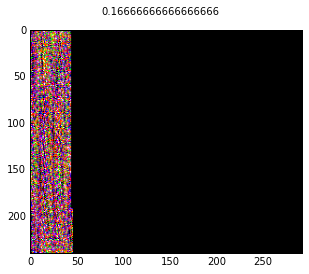

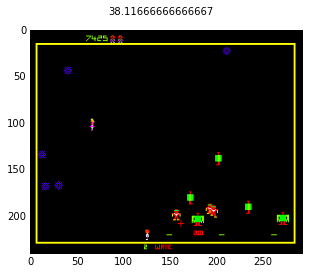

In [20]:
vid = imageio.get_reader(filename, 'ffmpeg')
nums = [10, 2287]
for num in nums:
    fig = plt.figure()
    timestamp = float(num) / vid.get_meta_data()['fps']
    fig.suptitle(timestamp)
    image = vid.get_data(num)
    plt.imshow(image)

In [14]:
count = 0
try:
    for _ in vid:
        count += 1
except RuntimeError:
    print('something went wront in iterating, maybee wrong fps number')
finally:
    print('number of frames counted {}, number of frames in metada {}'.format(count, vid.get_meta_data()['nframes']))


number of frames counted 2703, number of frames in metada 2703


In [1]:
import struct
import zlib 

inp_file = '/Users/bzztbomb/projects/mame/inp/inputs4'
data = open(inp_file, "rb").read()

magic = struct.Struct('q').unpack(b'MAMEINP\x00')[0]

header_struct = struct.Struct('=qqbbH12s32s')
(header, basetime, version_major, version_minor, reserved, sysname, appdesc) = header_struct.unpack(data[:64])
print(header, basetime, version_major, version_minor, reserved, sysname, appdesc)

moves = zlib.decompress(data[64:])
record_struct = struct.Struct('=iqIIIIIII')
# robotron has three input ports
moveSize = 40
totalMoves = str(len(moves) // moveSize)
print ("Total moves: " + str(totalMoves))

# Print out a set of moves
#begin = moveSize * 1000
#for i in range(100):
#    (seconds, attoseconds, machine_speed, port0_def, port0_value, port1_def, port1_value, port2_def, port2_value) = record_struct.unpack(moves[begin:begin+moveSize])
#    begin = begin + moveSize
#   print (seconds, attoseconds, machine_speed, port0_def, port0_value, port1_def, port1_value, port2_def, port2_value)

# Print out distinct values of the ports
begin = 0
port_values = [{}, {}, {}]
for i in range(2708):
    (seconds, attoseconds, machine_speed, port0_def, port0_value, port1_def, port1_value, port2_def, port2_value) = record_struct.unpack(moves[begin:begin+moveSize])
    begin = begin + moveSize
    port_values[0][port0_value] = 1
    port_values[1][port1_value] = 1
    port_values[2][port2_value] = 1
print(port_values[0].keys())
print(port_values[1].keys())
print(port_values[2].keys())

22604074739122509 1485487678 3 0 3476 b'robotron\x00\x00\x00\x00' b'MAME 0.181 (mame0181-646-g063ea0'
Total moves: 2708
dict_keys([0, 1, 2, 68, 5, 6, 65, 64, 73, 74, 132, 66, 138, 16, 137, 4, 69, 130, 70, 129, 72, 128, 8, 9, 136, 10, 134])
dict_keys([0, 1, 2])
dict_keys([0, 16])


PORT_START("IN0")
PORT_BIT( 0x01, IP_ACTIVE_HIGH, IPT_JOYSTICKLEFT_UP ) PORT_NAME("Move Up")
PORT_BIT( 0x02, IP_ACTIVE_HIGH, IPT_JOYSTICKLEFT_DOWN ) PORT_NAME("Move Down")
PORT_BIT( 0x04, IP_ACTIVE_HIGH, IPT_JOYSTICKLEFT_LEFT ) PORT_NAME("Move Left")
PORT_BIT( 0x08, IP_ACTIVE_HIGH, IPT_JOYSTICKLEFT_RIGHT ) PORT_NAME("Move Right")
PORT_BIT( 0x10, IP_ACTIVE_HIGH, IPT_START1 )
PORT_BIT( 0x20, IP_ACTIVE_HIGH, IPT_START2 )
PORT_BIT( 0x40, IP_ACTIVE_HIGH, IPT_JOYSTICKRIGHT_UP ) PORT_NAME("Fire Up")
PORT_BIT( 0x80, IP_ACTIVE_HIGH, IPT_JOYSTICKRIGHT_DOWN ) PORT_NAME("Fire Down")

PORT_START("IN1")
PORT_BIT( 0x01, IP_ACTIVE_HIGH, IPT_JOYSTICKRIGHT_LEFT ) PORT_NAME("Fire Left")
PORT_BIT( 0x02, IP_ACTIVE_HIGH, IPT_JOYSTICKRIGHT_RIGHT ) PORT_NAME("Fire Right")
PORT_BIT( 0xfc, IP_ACTIVE_HIGH, IPT_UNKNOWN )


In [1]:
import tensorflow as tf

In [2]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

In [3]:
print (tf.__version__)


0.12.1


In [ ]:
tf.varia